<a href="https://colab.research.google.com/github/MariaReneeGonzalezBravo/SIMULACION-1/blob/main/M%C3%A9todo_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Método de Monte Carlo**

*   18/06/24


*   González Bravo María Renée




El método de Monte Carlo tiene la idea principal de poder calcular una aproximación de una integral de manera más sencilla.

Si deseamos calcular la integral $I = \int_{a}^{b} g(x)dx$ para alguna función $g(x)$ díficil de integrar analíticamente, podemos hacer la siguiente sustitución:

$ I = \int_{a}^{b} g(x)dx =  \int_{a}^{b} w(x)f(x)dx$

donde $w(x)= g(x)(b - a)$ y $f(x) = \frac{1}{b - a}$. Por lo tanto, la integral transformada puede interpretarse como un múltiplo de valor esperado de $g(x)$ bajo la distribución uniforme:

$E(g(x)) = \frac{1}{b -a}$, con $X \sim Unif(a,b)$

Si tomamos una muestra de números pseudoleatorios uniformemente distribuidos, digamos $X_1, ...., X_N \sim Unif(a,b)$, por *ley de los grandes números* para $N$ suficientemente grande tendremos que, con probabilidad 1:

$\frac{1}{N} \sum_{i=1}^N g(X_i) \to E(g(x)) = \frac{1}{b -a}$





In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

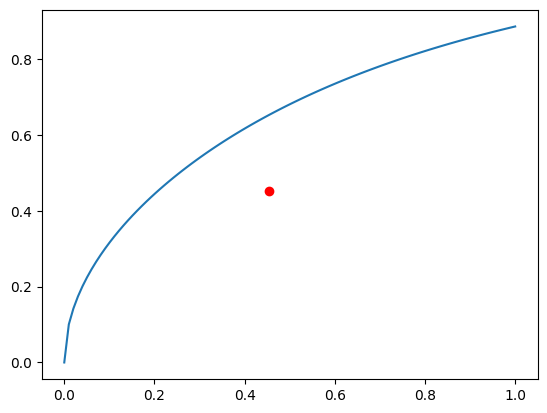

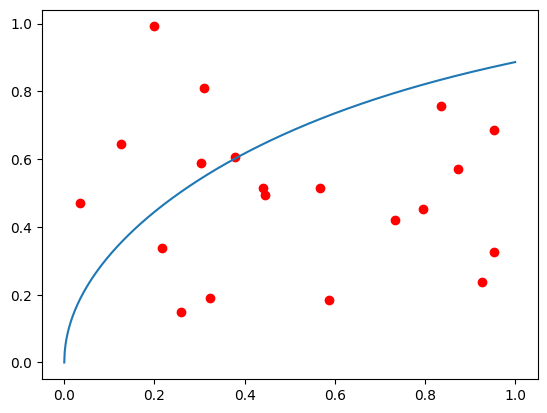

Media: 0.627849349679276
Varianza: 7.590902653869208e-05


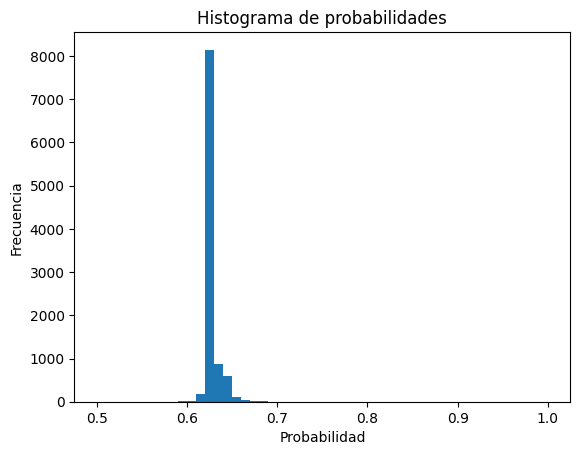

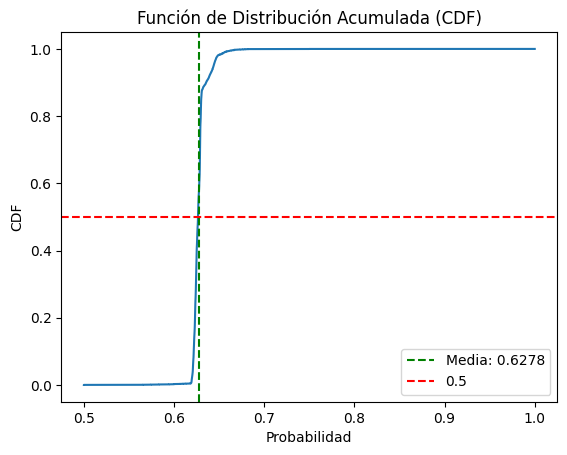

In [31]:
# Método de Monte Carlo

# Generar 100 puntos entre 0 y 1
x = np.linspace(0, 1, 100)

# Generar puntos aleatorios
u_1 = rnd.random()
u_2 = rnd.random()

# Graficar la raíz del arctangente
plt.plot(x, np.sqrt(np.arctan(x)))

# Graficar el punto aleatorio
plt.scatter(u_1, u_2, color="red")

# Mostrar la gráfica
plt.show()

# Graficar experimentos
x = np.linspace(0, 1, 1000)
n = 20
u_1 = []
u_2 = []
for i in range(n):
    u_1.append(rnd.random())
    u_2.append(rnd.random())

plt.plot(x, np.sqrt(np.arctan(x)))
plt.scatter(u_1, u_2, color="red")
plt.show()

# Función para determinar si un punto es un "éxito"
def est():
    u_1 = rnd.random()
    u_2 = rnd.random()
    if u_2 <= np.sqrt(np.arctan(u_1)):
        return "exito"
    else:
        return "fracaso"

# Función de Monte Carlo para contar éxitos
def Monte_Carlo(n):
    ex = 0
    for i in range(n):
        if est() == "exito":
            ex += 1
    return ex / n

# Función de Monte Carlo para obtener probabilidades
def Monte_Carlo_prob(n):
    prob = []
    ex = 0
    for i in range(n):
        if est() == "exito":
            ex += 1
        prob.append(ex / (i + 1))
    return prob

# Ejecución de Monte Carlo con 10000 experimentos
G = Monte_Carlo_prob(10000)

# Histograma
media = np.mean(G)
print("Media:", media)

varianza = np.var(G)
print("Varianza:", varianza)

plt.hist(G, bins=50)  # Histograma
plt.title("Histograma de probabilidades")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()

# Gráfica de distribución acumulada (CDF)
def cdf(G):
    n = len(G)
    x = np.sort(G)
    y = np.arange(0, n) / n
    return x, y

X, Y = cdf(G)

plt.step(X, Y)  # Gráfica de distribución acumulada
plt.axvline(media, color="green", linestyle="--", label=f'Media: {media:.4f}')
plt.axhline(0.5, color="red", linestyle="--", label='0.5')
plt.title("Función de Distribución Acumulada (CDF)")
plt.xlabel("Probabilidad")
plt.ylabel("CDF")
plt.legend()
plt.show()


In [32]:
Monte_Carlo(10000) #Aproximación

0.6385

# ***Intervalo de confianza***
En la determinación de los inervalos de confianza utilizamos el *Teorema del límite central* donde este Teorema establece que la suma de $n$ variables aleatorias independientes, obtenidas de un universo con media $\mu$ y varianza $\sigma^2$, es aproximandamente una distribución normal con media $n\mu$ y varianza $n\sigma^2$

En este caso, nosotros no conocemos la varianza, conocemos una aproximación de la misma, sabiendo esto, usaremos un **estimador de la varianza**
$S^2 = \frac{1}{n - 1} \sum_{i=1} (X_i - \overline {x} )^2$

Así obtenemos

$ \frac{ \overline {x} - \mu }{S/ \sqrt{n}} $

lo cual sigue una distribución $t$ con $n - 1$ grados de libertad. De acuerdo a esta distribución y suponiendo un nivel de riesgo de $\alpha$ se obtiene el intervalo de confianza de la media $\mu$ como:

$Prob \big\{  \overline {x} -  \frac{ S }{\sqrt{n}} t_{n-1, \alpha/2} \leq \mu \leq   \overline {x} + \frac{ S }{\sqrt{n}} t_{n-1, \alpha/2}  \big\} = 1 - \alpha $

El cual define un ancho del intervalo de confianza de:

$ \frac{ 2S t_{n-1, \alpha/2} }{\sqrt{n}}  $

En este caso se tomará un intervalo de confianza del $95\%$ es decir, $\alpha = 5\%$



In [33]:
#Estimador de Varianza

# Número de puntos
n = 10000

# Media muestral
mean_G = np.mean(G) # donde G es una Ejecución de Monte Carlo con 10000 experimentos G = Monte_Carlo(10000)

# Varianza muestral
var = (1 / (n - 1)) * sum((G - mean_G)**2)
print(" Estimador de Varianza:", var)

#Así su desviación estandar está dada por:
print(" Desviación Estandar:", (var)**(1/2) )


 Estimador de Varianza: 7.591661820051245e-05
 Desviación Estandar: 0.008713014300488233


In [34]:
from scipy import stats

# Valor crítico t para un intervalo de confianza del 95% con n-1 grados de libertad
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, n - 1)
print("valor de t en t de student =",t_critical)
# Cálculo del intervalo de confianza
a = mean_G - ((var)**(1/2) * t_critical) / np.sqrt(n)
b = mean_G + ((var)**(1/2) * t_critical) / np.sqrt(n)

print(f"Intervalo de confianza del 95%: ({a}, {b})")

#Ancho del intervalo
A = 2*(var)**(1/2)*t_critical /n**(1/2)
print(f"Ancho del intervalo de confianza:",A)

valor de t en t de student = 1.9602012636213575
Intervalo de confianza del 95%: (0.6276785570628582, 0.6280201422956937)
Ancho del intervalo de confianza: 0.0003415852328353598


# **Método de media muestral**

**Paso 1:** Generar una secuencia {$U_i$}$^n_{i=1} \sim Unif(0,1)$

**Paso 2:** Calcular $X_i = a + U_i(b - a)$

**Paso 3:** Calcular $g(x_i)$, para $i=1,...,n$

**Paso 4:** Estimar $I$ calculando la media muestral


Integral aproximada: 0.6269736646804563


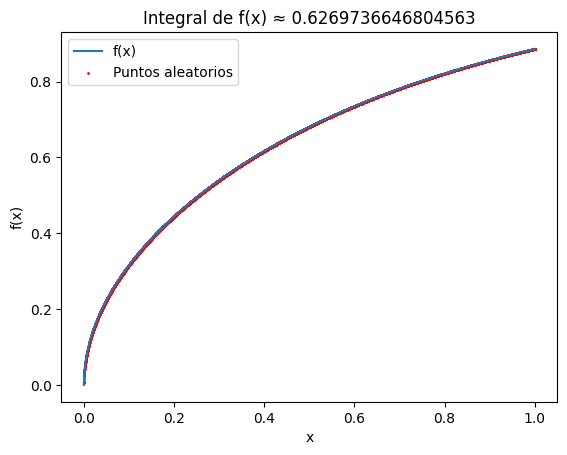

In [35]:
# Definir la función a integrar
def f(x):
    return np.sqrt(np.arctan(x))

# Intervalo de integración
a, b = 0, 1

# Número de puntos aleatorios
n_puntos = 10000

# Paso 1: Generar una secuencia {Ui} ~ Unif(0, 1)
U = np.random.uniform(0, 1, n_puntos)

# Paso 2: Calcular Xi = a + Ui(b - a)
X = a + U * (b - a)

# Paso 3: Calcular g(Xi) para i = 1, ..., n
g_X = f(X)

# Paso 4: Estimar I calculando la media muestral
integral_aprox = np.mean(g_X) * (b - a)
print(f"Integral aproximada: {integral_aprox}")

# Graficar la función y los puntos aleatorios
x_vals = np.linspace(a, b, 1000)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.scatter(X, g_X, color='red', s=1, label='Puntos aleatorios')
plt.legend()
plt.title(f"Integral de f(x) ≈ {integral_aprox}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Intervalo de confianza**

In [36]:
# Cálculo de la varianza muestral
var = (1 / (n_puntos - 1)) * sum((g_X - np.mean(g_X))**2)
print("Estimador de Varianza:", var)

# Cálculo de la desviación estándar muestral
std = np.sqrt(var)
print("Desviación Estándar:", std)

# Cálculo del valor crítico t para un intervalo de confianza del 95% con n-1 grados de libertad
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, n_puntos - 1)

# Cálculo del intervalo de confianza
a_conf = integral_aprox - (std * t_critical) / np.sqrt(n_puntos)
b_conf = integral_aprox + (std * t_critical) / np.sqrt(n_puntos)

print(f"Intervalo de confianza del 95%: ({a_conf}, {b_conf})")

#Ancho del intervalo
A = 2*std*t_critical /n**(1/2)
print(f"Ancho del intervalo de confianza:",A)

Estimador de Varianza: 0.0429599261503055
Desviación Estándar: 0.20726776437812394
Intervalo de confianza del 95%: (0.6229107993440366, 0.6310365300168761)
Ancho del intervalo de confianza: 0.008125730672839447


# **Método acierto y error**

**Paso 1:** Generar una secuencia {$U_i$}$^{2n}_{i=1} \sim Unif(0,1)$

**Paso 2:** Conformar pares ($  U_i, U_{n+i} $), para $i=1,...,n$

**Paso 3:** Calcular $X_i=a +U_i(b - a) $, para $i=1,...,n$


**Paso 4:** Calcular $g(x_i)$, para $i=1,...,n$

**Paso 5:** Contar los aciertos $n_a$ tales que $g(X_i) > cU_{n+i}$


**Paso 6:** Estimar $I$ calculando la media muestral


Integral aproximada: 0.633


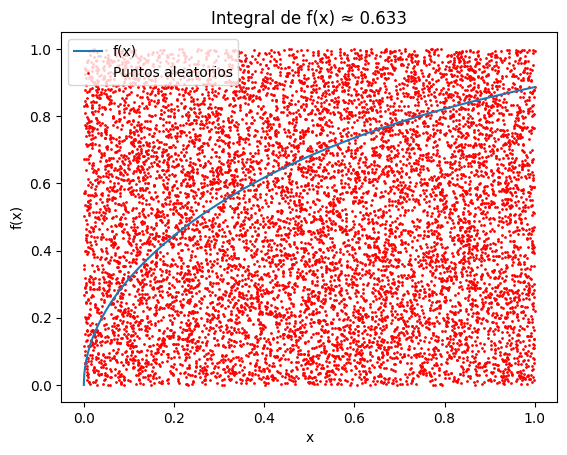

In [37]:

# Número de pares de puntos aleatorios
n_pares = 10000

# Paso 1: Generar una secuencia {Ui} de tamaño 2n
U = np.random.uniform(0, 1, 2 * n_pares)

# Paso 2: Conformar pares (Ui, Un+i)
U1 = U[:n_pares]
U2 = U[n_pares:]

# Paso 3: Calcular Xi = a + Ui(b - a)
X = a + U1 * (b - a)

# Paso 4: Calcular g(Xi) para i = 1, ..., n
g_X = f(X)

# Paso 5: Contar los aciertos na tales que g(Xi) > cUn+i
c = 1.0  # c es el valor máximo conocido de la función f(x) en el intervalo [0, 1]
aciertos = g_X > c * U2
n_aciertos = np.sum(aciertos)

# Paso 6: Estimar I calculando la media muestral
integral_aprox = n_aciertos / n_pares * (b - a) * c
print(f"Integral aproximada: {integral_aprox}")

# Graficar la función y los puntos aleatorios
x_vals = np.linspace(a, b, 1000)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.scatter(X, U2 * c, color='red', s=1, label='Puntos aleatorios')
plt.legend()
plt.title(f"Integral de f(x) ≈ {integral_aprox}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**Intervalo de confianza**

In [38]:
# Cálculo de la varianza muestral
var = (1 / (n_pares - 1)) * sum((aciertos - np.mean(aciertos))**2)
print("Estimador de Varianza:", var)

# Cálculo de la desviación estándar muestral
std = np.sqrt(var)
print("Desviación Estándar:", std)

# Cálculo del valor crítico t para un intervalo de confianza del 95% con n-1 grados de libertad
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, n_pares - 1)

# Cálculo del intervalo de confianza
a_conf = integral_aprox - (std * t_critical) / np.sqrt(n_pares)
b_conf = integral_aprox + (std * t_critical) / np.sqrt(n_pares)

print(f"Intervalo de confianza del 95%: ({a_conf}, {b_conf})")

#Ancho del intervalo
A = 2*std*t_critical /n**(1/2)
print(f"Ancho del intervalo de confianza:",A)

Estimador de Varianza: 0.23233423342334764
Desviación Estándar: 0.4820106154674891
Intervalo de confianza del 95%: (0.6235516218248172, 0.6424483781751829)
Ancho del intervalo de confianza: 0.018896756350365605


# **Comparación de resultados**

Para determinar cuál de los tres muestreos es el mejor en función de sus intervalos de confianza, necesitamos considerar los siguientes puntos

1. **Amplitud del intervalo de confianza**: Un intervalo de confianza más estrecho indica una estimación más precisa del parámetro de interés (como la media o la proporción). En general, un intervalo más estrecho suele ser mejor porque proporciona una estimación más precisa.

2. **Nivel de confianza**: Todos los intervalos de confianza deben tener el mismo nivel de confianza para ser comparables (por ejemplo, 95% de confianza).

3. **Tamaño del tamaño de muestra**: Experimentos con muestras más grandes tienden a tener intervalos de confianza más estrechos, lo cual es beneficioso.

En nuestro caso, los 3 métodos tienen el mismo nivel de confianza t tamaño de muestra, por lo tanto comapraremos el ancho de cada intervalo, donde este se define como:

$ \frac{ 2S t_{n-1, \alpha/2} }{\sqrt{n}}  $

**Ancho de inervalo del Método Monte Carlo ordinario:** 0.0003415852328353598

**Ancho de inervalo del Método Monte Carlo media muestral:** 0.008125730672839447

**Ancho de inervalo del Método Monte Carlo acierto y error:** 0.018896756350365605

donde en el método Monte Carlo Acierto y Error logramos un intervalo de confianza bastante bueno, veamos que tal está su aproximación al valor real analítico:


**Aproximación Método Monte Carlo acierto y error:** 0.6269736646804563

**Valor real analítico:** 0.62982

Por lo tanto, concluimos que en este caso, la aproximación de el **Método Monte Carlo acierto y error** logró una mejor aproximación en comparación a los otros dos métodos.
